In [1]:
import numpy as np
from copulas.multivariate import Multivariate
import matplotlib.pyplot as plt
from scipy.stats import expon
import pandas as pd
import utils

In [2]:
free_parameters = \
{'cov_para_1': -0.2032171878313589, 'cov_para_2': -0.09705798541074251, 'cov_para_3': -0.01207720888328545, 'cov_para_4': -0.16562821474295708, 'cov_para_5': 0.031165717597647413, 'cov_para_6': 0.45706120092331026, 'cov_para_7': 0.35593483991937036, 'cov_para_8': 0.23501621919927318, 'cov_para_9': 0.02730214144187726, 'cov_para_10': -0.14736884340092482, 'beta_1a': 2.4793131769797547, 'beta_1b': 17.056287671628542, 'beta_2a': 6.193287980559434, 'beta_2b': 14.319061046194905, 'beta_3a': 7.224012888962953, 'beta_3b': 15.767156534836811, 'beta_4a': 11.367271271901247, 'beta_4b': 6.802473928217605, 'beta_5a': 1.1189601959050408, 'beta_5b': 11.364225451041479, 'lambda_expon_1': 0.05487860822284998, 'lambda_expon_2': 0.07375675267067743, 'lambda_expon_3': 0.06365766426604727, 'lambda_expon_4': 0.0779408329226152}


In [3]:
free_parameters = \
{"beta_1a": 6.860978007316589, "beta_1b": 17.40923762321472, "beta_2a": 18.496012687683105, "beta_2b": 6.598151326179504, "beta_3a": 13.548948764801025, "beta_3b": 9.540044665336609, "beta_4a": 19.510585069656372, "beta_4b": 17.635220289230347, "beta_5a": 2.291204184293747, "beta_5b": 15.423170328140259, "cov_para_1": -0.38677872419357295, "cov_para_10": 0.8173562049865722, "cov_para_2": -0.16847442984580996, "cov_para_3": 0.21017500162124636, "cov_para_4": -0.2151525914669037, "cov_para_5": 0.5260870814323425, "cov_para_6": 0.5898452281951904, "cov_para_7": 0.4624871850013733, "cov_para_8": -0.3761110424995422, "cov_para_9": -0.31329204440116887, "lambda_expon_1": 0.07633687347173691, "lambda_expon_2": 0.0885584039092064, "lambda_expon_3": 0.05557734173536301, "lambda_expon_4": 0.04063994941115379}

In [4]:
free_parameters = \
{"beta_1a": 2.4793131769797547, "beta_1b": 17.056287671628542, "beta_2a": 6.193287980559434, "beta_2b": 14.319061046194905, "beta_3a": 7.224012888962953, "beta_3b": 15.767156534836811, "beta_4a": 11.367271271901247, "beta_4b": 6.802473928217605, "beta_5a": 1.1189601959050408, "beta_5b": 11.364225451041479, "cov_para_1": -0.2032171878313589, "cov_para_10": -0.14736884340092482, "cov_para_2": -0.09705798541074251, "cov_para_3": -0.01207720888328545, "cov_para_4": -0.16562821474295708, "cov_para_5": 0.031165717597647413, "cov_para_6": 0.45706120092331026, "cov_para_7": 0.35593483991937036, "cov_para_8": 0.23501621919927318, "cov_para_9": 0.02730214144187726, "lambda_expon_1": 0.05487860822284998, "lambda_expon_2": 0.07375675267067743, "lambda_expon_3": 0.06365766426604727, "lambda_expon_4": 0.0779408329226152}

In [5]:
free_para1 = free_parameters['cov_para_1']
free_para2 = free_parameters['cov_para_2']
free_para3 = free_parameters['cov_para_3']
free_para4 = free_parameters['cov_para_4']
free_para5 = free_parameters['cov_para_5']
free_para6 = free_parameters['cov_para_6']
free_para7 = free_parameters['cov_para_7']
free_para8 = free_parameters['cov_para_8']
free_para9 = free_parameters['cov_para_9']
free_para10 = free_parameters['cov_para_10']

diag_1 = 1
diag_2 = np.sqrt(1-free_para1**2)
if (1-free_para2**2-free_para3**2)<0:
    diag_3 = np.sqrt(np.abs(1-free_para2**2-free_para3**2))
else:
    diag_3 = np.sqrt(1-free_para2**2-free_para3**2)

if (1-free_para4**2-free_para5**2-free_para6**2)<0:
    diag_4 = np.sqrt(np.abs(1-free_para4**2-free_para5**2-free_para6**2))
else:
    diag_4 = np.sqrt(1-free_para4**2-free_para5**2-free_para6**2)

if (1-free_para7**2-free_para8**2-free_para9**2-free_para10**2)<0:
    diag_5 = np.sqrt(np.abs(1-free_para7**2-free_para8**2-free_para9**2-free_para10**2))
else:
    diag_5 = np.sqrt(1-free_para7**2-free_para8**2-free_para9**2-free_para10**2)



lower_triangular_matrix = np.asarray([[diag_1,0,0,0,0],
                        [free_para1,diag_2,0,0,0],
                        [free_para2,free_para3,diag_3,0,0],
                        [free_para4,free_para5,free_para6,diag_4,0],
                        [free_para7,free_para8,free_para9,free_para10,diag_5]])


cov_matrix = lower_triangular_matrix@lower_triangular_matrix.transpose()


#now, define the marginal distribution of the gaussian copula
univerates = [{'loc': 0,
'scale': 1,
'a': free_parameters['beta_1a'],
'b': free_parameters['beta_1b'],
'type': 'copulas.univariate.beta.BetaUnivariate'},
{'loc': 0,
'scale': 1,
'a': free_parameters['beta_2a'],
'b': free_parameters['beta_2b'],
'type': 'copulas.univariate.beta.BetaUnivariate'},
{'loc': 0,
'scale': 1,
'a': free_parameters['beta_3a'],
'b': free_parameters['beta_3b'],
'type': 'copulas.univariate.beta.BetaUnivariate'},
{'loc': 0,
'scale': 1,
'a': free_parameters['beta_4a'],
'b': free_parameters['beta_4b'],
'type': 'copulas.univariate.beta.BetaUnivariate'},
{'loc': 0,
'scale': 1,
'a': free_parameters['beta_5a'],
'b': free_parameters['beta_5b'],
'type': 'copulas.univariate.beta.BetaUnivariate'}]


#now, we construct the gaussian copula
copula_parameters = {}
copula_parameters['covariance'] = cov_matrix
copula_parameters['univariates'] = univerates
copula_parameters['type'] = 'copulas.multivariate.gaussian.GaussianMultivariate'
copula_parameters['columns'] = [0,1,2,3,4]

new_dist = Multivariate.from_dict(copula_parameters)

In [6]:
cov_matrix

array([[ 1.        , -0.20321719, -0.09705799, -0.16562821,  0.35593484],
       [-0.20321719,  1.        ,  0.00789865,  0.0641739 ,  0.15778022],
       [-0.09705799,  0.00789865,  1.        ,  0.47056894, -0.01021342],
       [-0.16562821,  0.0641739 ,  0.47056894,  1.        , -0.16785008],
       [ 0.35593484,  0.15778022, -0.01021342, -0.16785008,  1.        ]])

In [7]:
#let's sample and plot the marginal distribution
samples = new_dist.sample(5000)

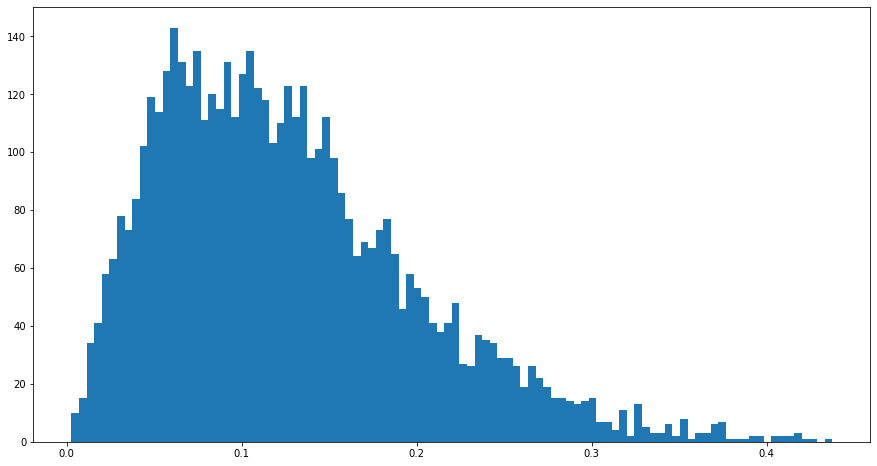

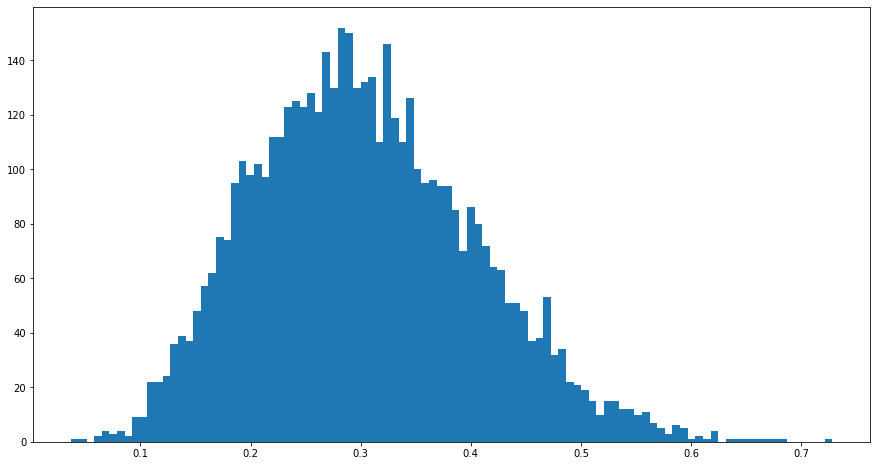

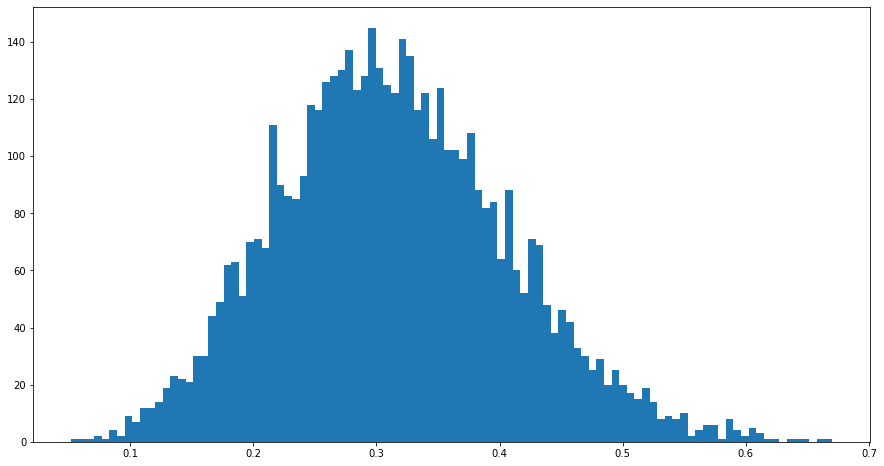

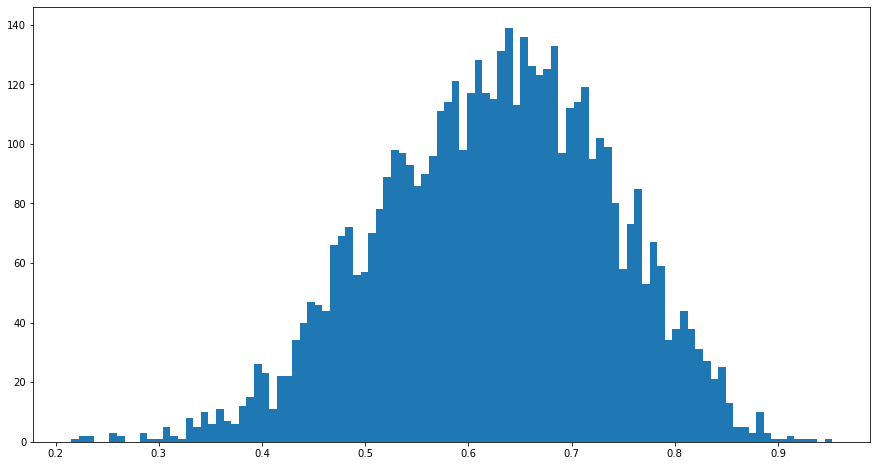

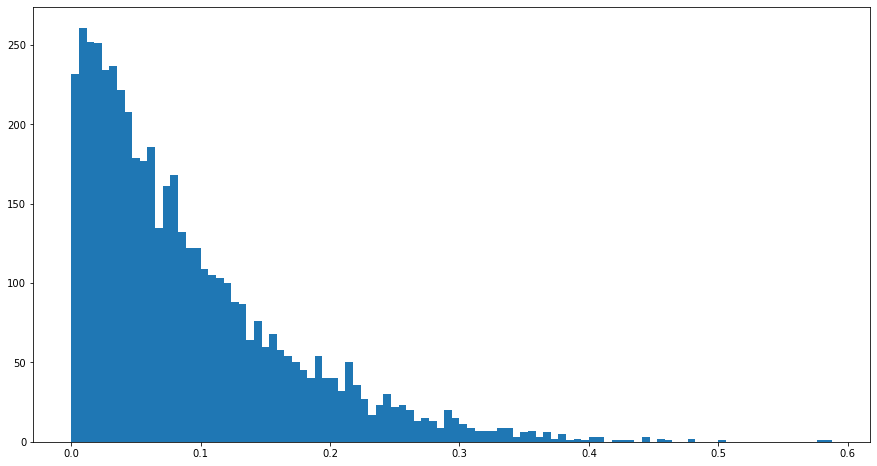

In [8]:
plt.rcParams["figure.figsize"] = (15,8)

for index in range(0,5):
    plt.hist(samples[index],bins = 100)
    plt.show()

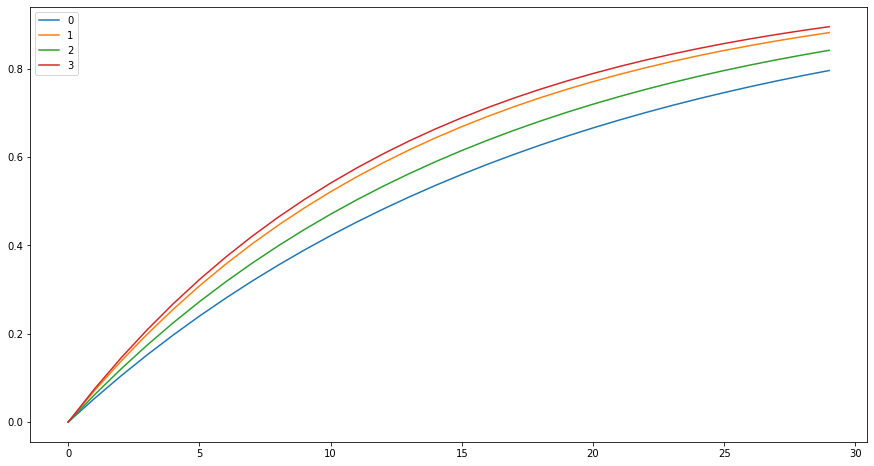

In [9]:
#other parameters needed for transforming the features
lambda_expon_1 = free_parameters['lambda_expon_1']
lambda_expon_2 = free_parameters['lambda_expon_2']
lambda_expon_3 = free_parameters['lambda_expon_3']
lambda_expon_4 = free_parameters['lambda_expon_4']
lambda_expons = [lambda_expon_1,lambda_expon_2,lambda_expon_3,lambda_expon_4]


for line_index in range(0,len(lambda_expons)):

    x_plot = []
    y_plot = []
    
    for fake_days in range(0,30):
        r = expon.cdf(fake_days,scale = 1.0/lambda_expons[line_index])
        y_plot.append(r)
        x_plot.append(fake_days)

    plt.plot(x_plot,y_plot,label = str(line_index))

plt.legend()
plt.show()

In [35]:
import trading_vix
env = trading_vix.trading_vix()

In [36]:
env.index_feature_dataframe

,vix_price_adj_close,vix_adj_close,days_since_5,days_since_6,days_since_7
0,44.680000,10.390000,15,15,148
1,43.720001,10.160000,16,16,149
2,44.320000,10.700000,17,17,150
3,44.799999,11.460000,1,18,151
4,43.279999,10.420000,2,19,152
...,...,...,...,...,...
995,8.190000,20.670000,3,7,80
996,8.080000,20.150000,4,8,81
997,7.710000,18.400000,5,9,82
998,7.710000,18.840000,6,10,83


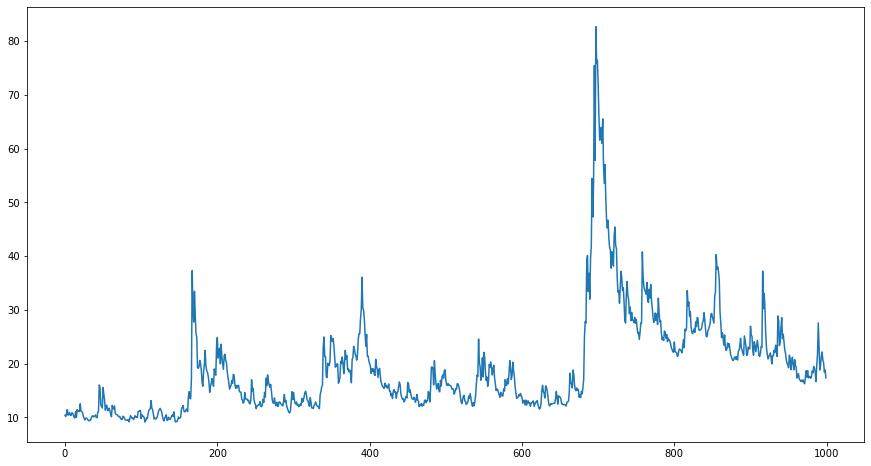

In [49]:
plt.plot(env.index_feature_dataframe['vix_adj_close'])
plt.show()

In [37]:
visualize_time_length = 200

price_history = []
vix_history = []
action_history1 = np.zeros((1,visualize_time_length+1))
action_history2 = np.zeros((1,visualize_time_length+1))
portfolio_value_history = []
transaction_value_history = []

price,current_feature,portfolio_value,current_vix = env.reset(return_price=True)
price_history.append(price)
portfolio_value_history.append(portfolio_value)
transaction_value_history.append(0)
vix_history.append(current_vix)

for time_index in range(0,visualize_time_length):
    
    #compute an action given current observation
    transformed_features = []
    for feature_index in range(len(lambda_expons)):
        transformation = expon.cdf(current_feature[feature_index,0],scale = 1.0/lambda_expons[feature_index])
        min_transformation = 0.1
        transformation = min_transformation*np.exp(np.log(1.0/min_transformation)*transformation)
        transformed_features.append(transformation)
    transformed_features = np.asarray(transformed_features)
    transformed_features = np.reshape(transformed_features,(1,-1))
    #holding_position = expit(current_feature[-1,:][0])
    holding_position = current_feature[-1,:][0]
    if holding_position<0:
        print('holding is less than 0, there is some problem and the holding position is',holding_position)
    if holding_position>1:
        print('holding is greater than 1, there is some problem and the holding position is',holding_position)
    min_transformed_holding = 0.1
    transformed_holding = min_transformed_holding*np.exp(np.log(1.0/min_transformed_holding)*holding_position)
    transformed_holding = np.reshape(transformed_holding,(1,1))
    data_point_for_df = np.concatenate((transformed_features,transformed_holding),axis = 1)

    assert data_point_for_df.shape[1] == 5
    data_point_for_copula = pd.DataFrame(data_point_for_df)
    action = new_dist.cdf(data_point_for_copula)
    
    #apply the action to the environment
    price, current_feature,execute_action,need_to_buy,need_to_sell,portfolio_value,transaction_value,\
    current_vix = env.step(action,return_price=True)

#     if execute_action and need_to_buy:
#         print('buy')
#         print('time index is',time_index)
#     if execute_action and need_to_sell:
#         print('sell')
#         print('time index is',time_index)
    
    #record price and action
    price_history.append(price)
    if execute_action:
        if need_to_buy:
            action_history1[0,time_index+1] = 2 #add 1 because of initial price observation
            #print('record buy action')
        if need_to_sell:
            action_history1[0,time_index+1] = 1
            #print('record sell action')

    action_history2[0,time_index+1] = action 
    portfolio_value_history.append(portfolio_value)
    transaction_value_history.append(transaction_value)
    vix_history.append(current_vix)

In [38]:
print(action_history1.shape)
print(action_history2.shape)
print(len(price_history))
print(len(portfolio_value_history))
print(len(transaction_value_history))
print(len(vix_history))

(1, 201)
(1, 201)
201
201
201
201


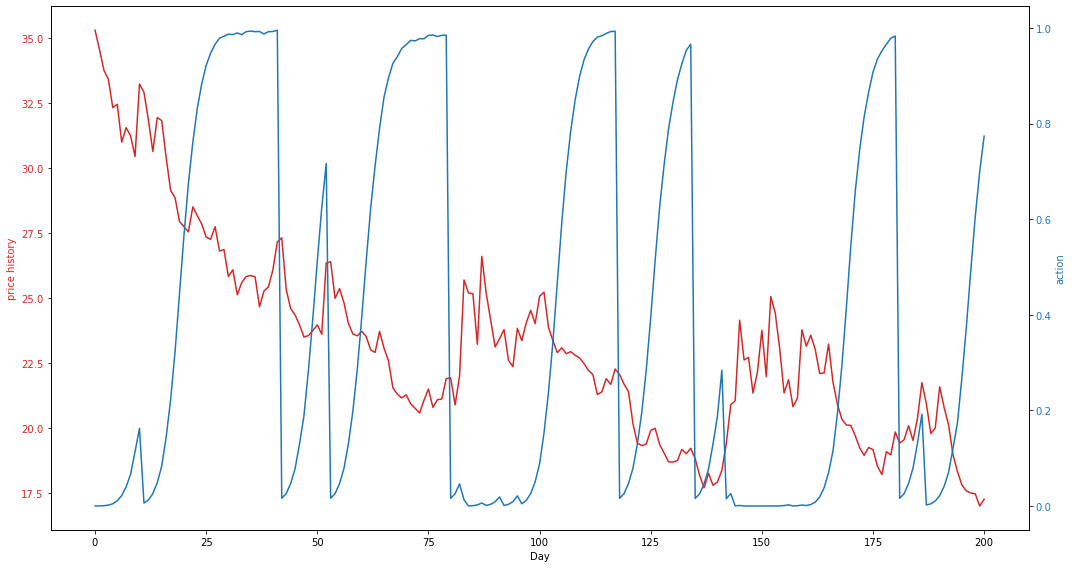

In [39]:
plt.rcParams["figure.figsize"] = (15,8)

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Day')
ax1.set_ylabel('price history', color=color)
ax1.plot(price_history, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('action', color=color)  # we already handled the x-label with ax1
ax2.plot(action_history2[0,:], color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

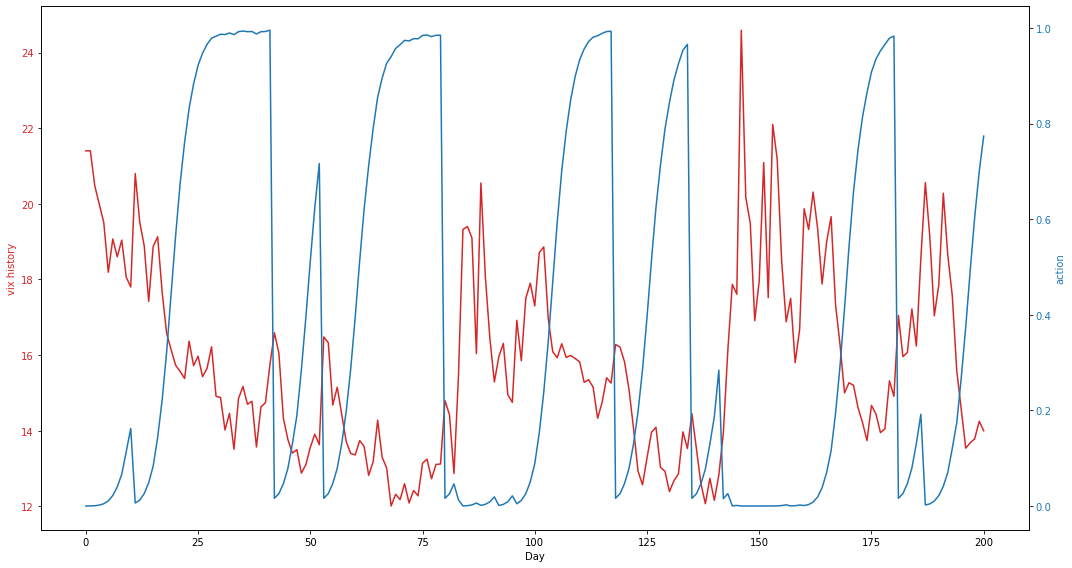

In [40]:
plt.rcParams["figure.figsize"] = (15,8)

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Day')
ax1.set_ylabel('vix history', color=color)
ax1.plot(vix_history, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('action', color=color)  # we already handled the x-label with ax1
ax2.plot(action_history2[0,:], color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

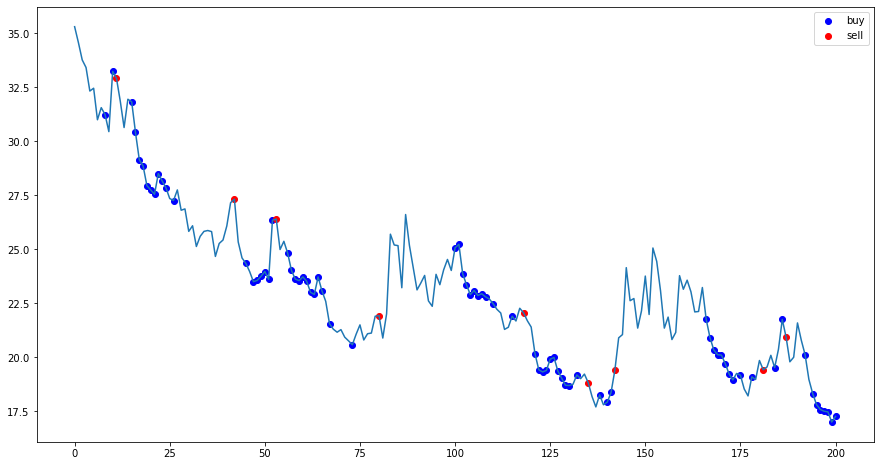

In [41]:
already_plotted_sell_legend = False
already_plotted_buy_legend = False

plt.plot(price_history)
for time_index in range(0,len(action_history1[0])):

    if action_history1[0,time_index]==2:
        #print('the buy price is',price_history[time_index])
        if already_plotted_sell_legend == False:
            plt.scatter(time_index,price_history[time_index],color = 'b',label = 'buy')
            already_plotted_sell_legend = True
        else:
            plt.scatter(time_index,price_history[time_index],color = 'b')

    elif action_history1[0,time_index]==1:
        #print('the sell price is',price_history[time_index])
        #print(' ')
        if already_plotted_buy_legend == False:
            plt.scatter(time_index,price_history[time_index],color = 'r',label = 'sell')
            already_plotted_buy_legend = True
        else:
            plt.scatter(time_index,price_history[time_index],color = 'r')
plt.legend()
plt.show()

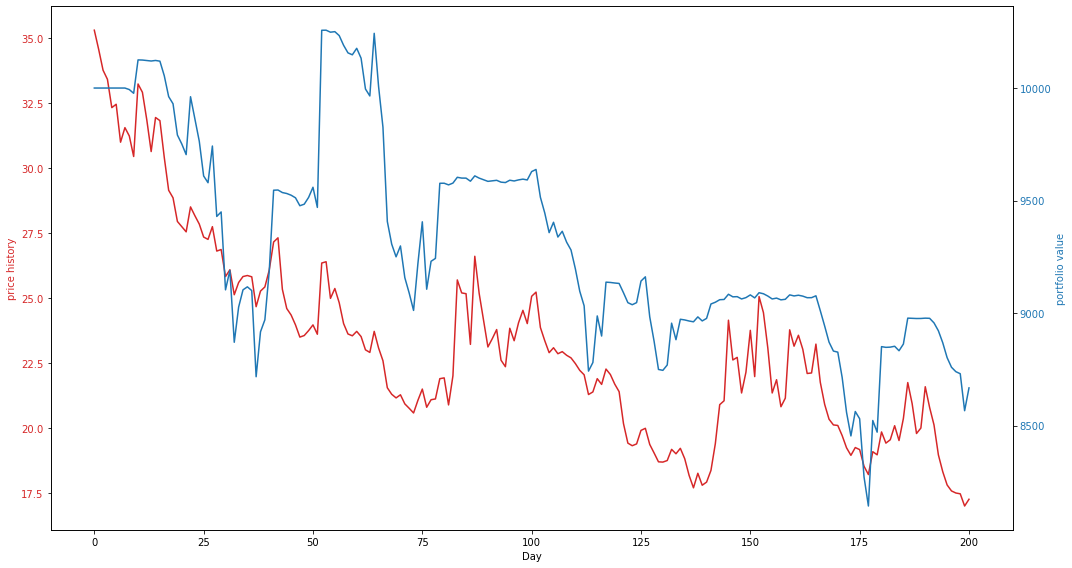

In [42]:
plt.rcParams["figure.figsize"] = (15,8)

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Day')
ax1.set_ylabel('price history', color=color)
ax1.plot(price_history, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('portfolio value', color=color)  # we already handled the x-label with ax1
ax2.plot(portfolio_value_history, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [43]:
df = pd.DataFrame()
df['suggested stock-total portfolio ratio'] = action_history2[0,:][0:35].tolist()
df['transaction_value'] = transaction_value_history[0:35]
df['execute_action'] = action_history1[0,:][0:35].tolist()

In [44]:
df

,suggested stock-total portfolio ratio,transaction_value,execute_action
0,0.000000,0.000000,0.0
1,0.000186,1.861047,0.0
2,0.000634,6.338176,0.0
3,0.001862,18.622184,0.0
4,0.004775,47.749057,0.0
5,0.010803,108.033396,0.0
6,0.021862,218.624006,0.0
7,0.039919,399.192602,0.0
8,0.066550,665.496600,2.0
9,0.113764,478.120628,0.0


In [45]:
end_portfolio_values = []


for iter_index in range(0,10):
    print(iter_index)
    
    visualize_time_length = 200

    price_history = []
    vix_history = []
    action_history1 = np.zeros((1,visualize_time_length+1))
    action_history2 = np.zeros((1,visualize_time_length+1))
    portfolio_value_history = []
    transaction_value_history = []

    price,current_feature,portfolio_value,current_vix = env.reset(return_price=True)
    price_history.append(price)
    portfolio_value_history.append(portfolio_value)
    transaction_value_history.append(0)
    vix_history.append(current_vix)

    for time_index in range(0,visualize_time_length):

        #compute an action given current observation
        transformed_features = []
        for feature_index in range(len(lambda_expons)):
            transformation = expon.cdf(current_feature[feature_index,0],scale = 1.0/lambda_expons[feature_index])
            min_transformation = 0.1
            transformation = min_transformation*np.exp(np.log(1.0/min_transformation)*transformation)
            transformed_features.append(transformation)
        transformed_features = np.asarray(transformed_features)
        transformed_features = np.reshape(transformed_features,(1,-1))
        #holding_position = expit(current_feature[-1,:][0])
        holding_position = current_feature[-1,:][0]
        if holding_position<0:
            print('holding is less than 0, there is some problem and the holding position is',holding_position)
        if holding_position>1:
            print('holding is greater than 1, there is some problem and the holding position is',holding_position)
        min_transformed_holding = 0.1
        transformed_holding = min_transformed_holding*np.exp(np.log(1.0/min_transformed_holding)*holding_position)
        transformed_holding = np.reshape(transformed_holding,(1,1))
        data_point_for_df = np.concatenate((transformed_features,transformed_holding),axis = 1)

        assert data_point_for_df.shape[1] == 5
        data_point_for_copula = pd.DataFrame(data_point_for_df)
        action = new_dist.cdf(data_point_for_copula)

        #apply the action to the environment
        price, current_feature,execute_action,need_to_buy,need_to_sell,portfolio_value,transaction_value,\
        current_vix = env.step(action,return_price=True)

    #     if execute_action and need_to_buy:
    #         print('buy')
    #         print('time index is',time_index)
    #     if execute_action and need_to_sell:
    #         print('sell')
    #         print('time index is',time_index)

        #record price and action
        price_history.append(price)
        if execute_action:
            if need_to_buy:
                action_history1[0,time_index+1] = 2 #add 1 because of initial price observation
                #print('record buy action')
            if need_to_sell:
                action_history1[0,time_index+1] = 1
                #print('record sell action')

        action_history2[0,time_index+1] = action 
        portfolio_value_history.append(portfolio_value)
        transaction_value_history.append(transaction_value)
        vix_history.append(current_vix)
        
        
    end_portfolio_values.append(portfolio_value_history[-1])

0
1
2
3
4
5
6
7
8
9


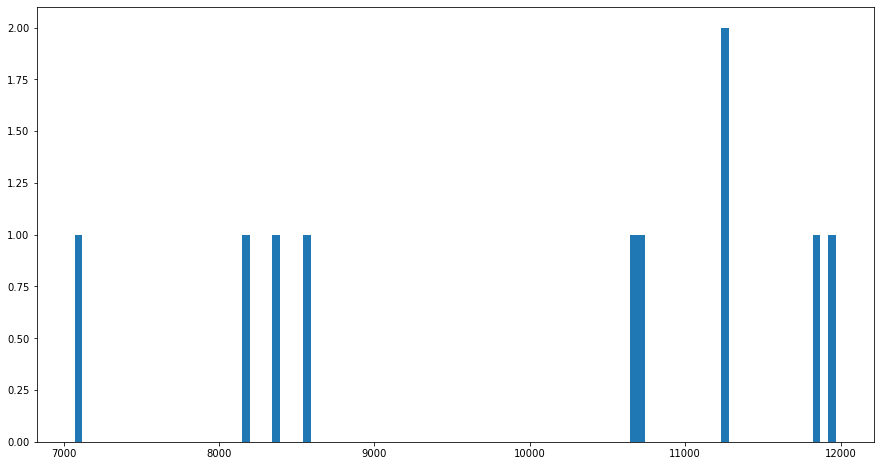

In [46]:
plt.hist(end_portfolio_values,bins = 100)
plt.show()

In [47]:
np.mean(end_portfolio_values)

9989.686894261653

In [48]:
np.mean(end_portfolio_values)-np.std(end_portfolio_values)

8315.520934435797